# MNIST & Overfitting

In this notebook we will work with the famous dataset MNIST (https://en.wikipedia.org/wiki/MNIST_database). This dataset is taken from (https://www.kaggle.com/c/digit-recognizer) in order for students to train their submission.

## Data Understanding

Let's load the dataset into pandas dataframes.

In [1]:
# Standard scientific Python imports
import pandas as pd
import matplotlib.pyplot as plt

# Load data
train = pd.read_csv("Data/train.csv")
val = pd.read_csv("Data/test.csv")

# Split data into 
X = train.drop(["label"],axis = 1)
y = train["label"]

X_val = val

/var/folders/rm/zd360c_n3394v5zq_gnyj9s00000gn/T/ipykernel_1951/2642119401.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
print("Training dataset : ")
print(X.info())
print("------------------------------------")
print("Validation dataset : ")
print(X_val.info())

Training dataset : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 251.2 MB
None
------------------------------------
Validation dataset : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB
None


Each line of the dataset contains the information of 784 pixels, i.e. a square image of 28 x 28 pixels with values ranging from 0 to 255.

## Preprocessing

We will simply normalize the values such that the grey shades are in an interval \[0, 1\].

In [3]:
X = X/255.0
X_val = X_val/255.0

## Exploratory Data Analysis

Let's try to print these images.

In [4]:
img_rows, img_cols = 28, 28

The first 5 lines are the following.

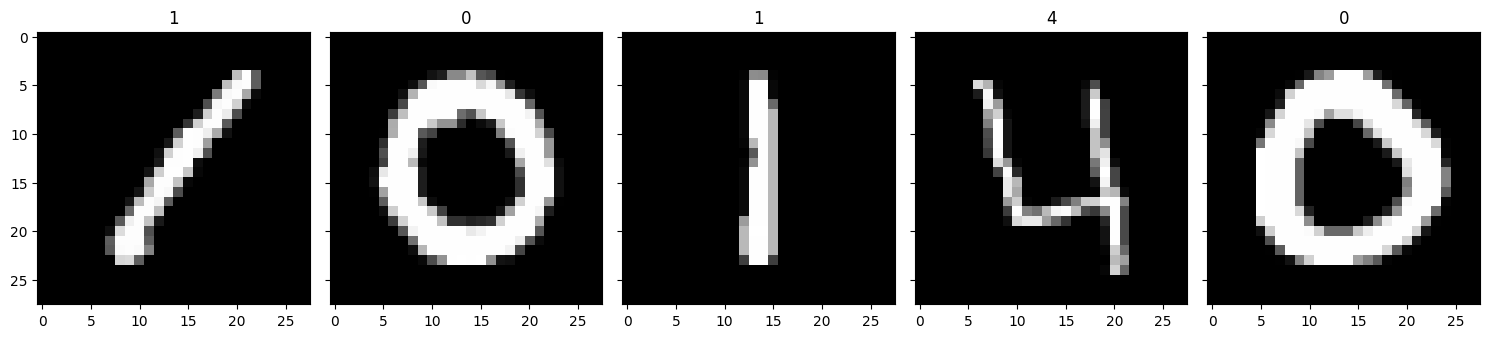

In [5]:
fig, axs = plt.subplots(1, 5, sharex=True, sharey=True, figsize=(15,5))
axs = axs.flatten()

for i in range(0,5):
    im = X.iloc[i]
    im = im.values.reshape(-1,img_rows,img_cols,1)
    axs[i].imshow(im[0,:,:,0], cmap=plt.get_cmap('gray'))
    axs[i].set_title(y[i])
plt.tight_layout()

Let's plot the first 10 digits from each category.

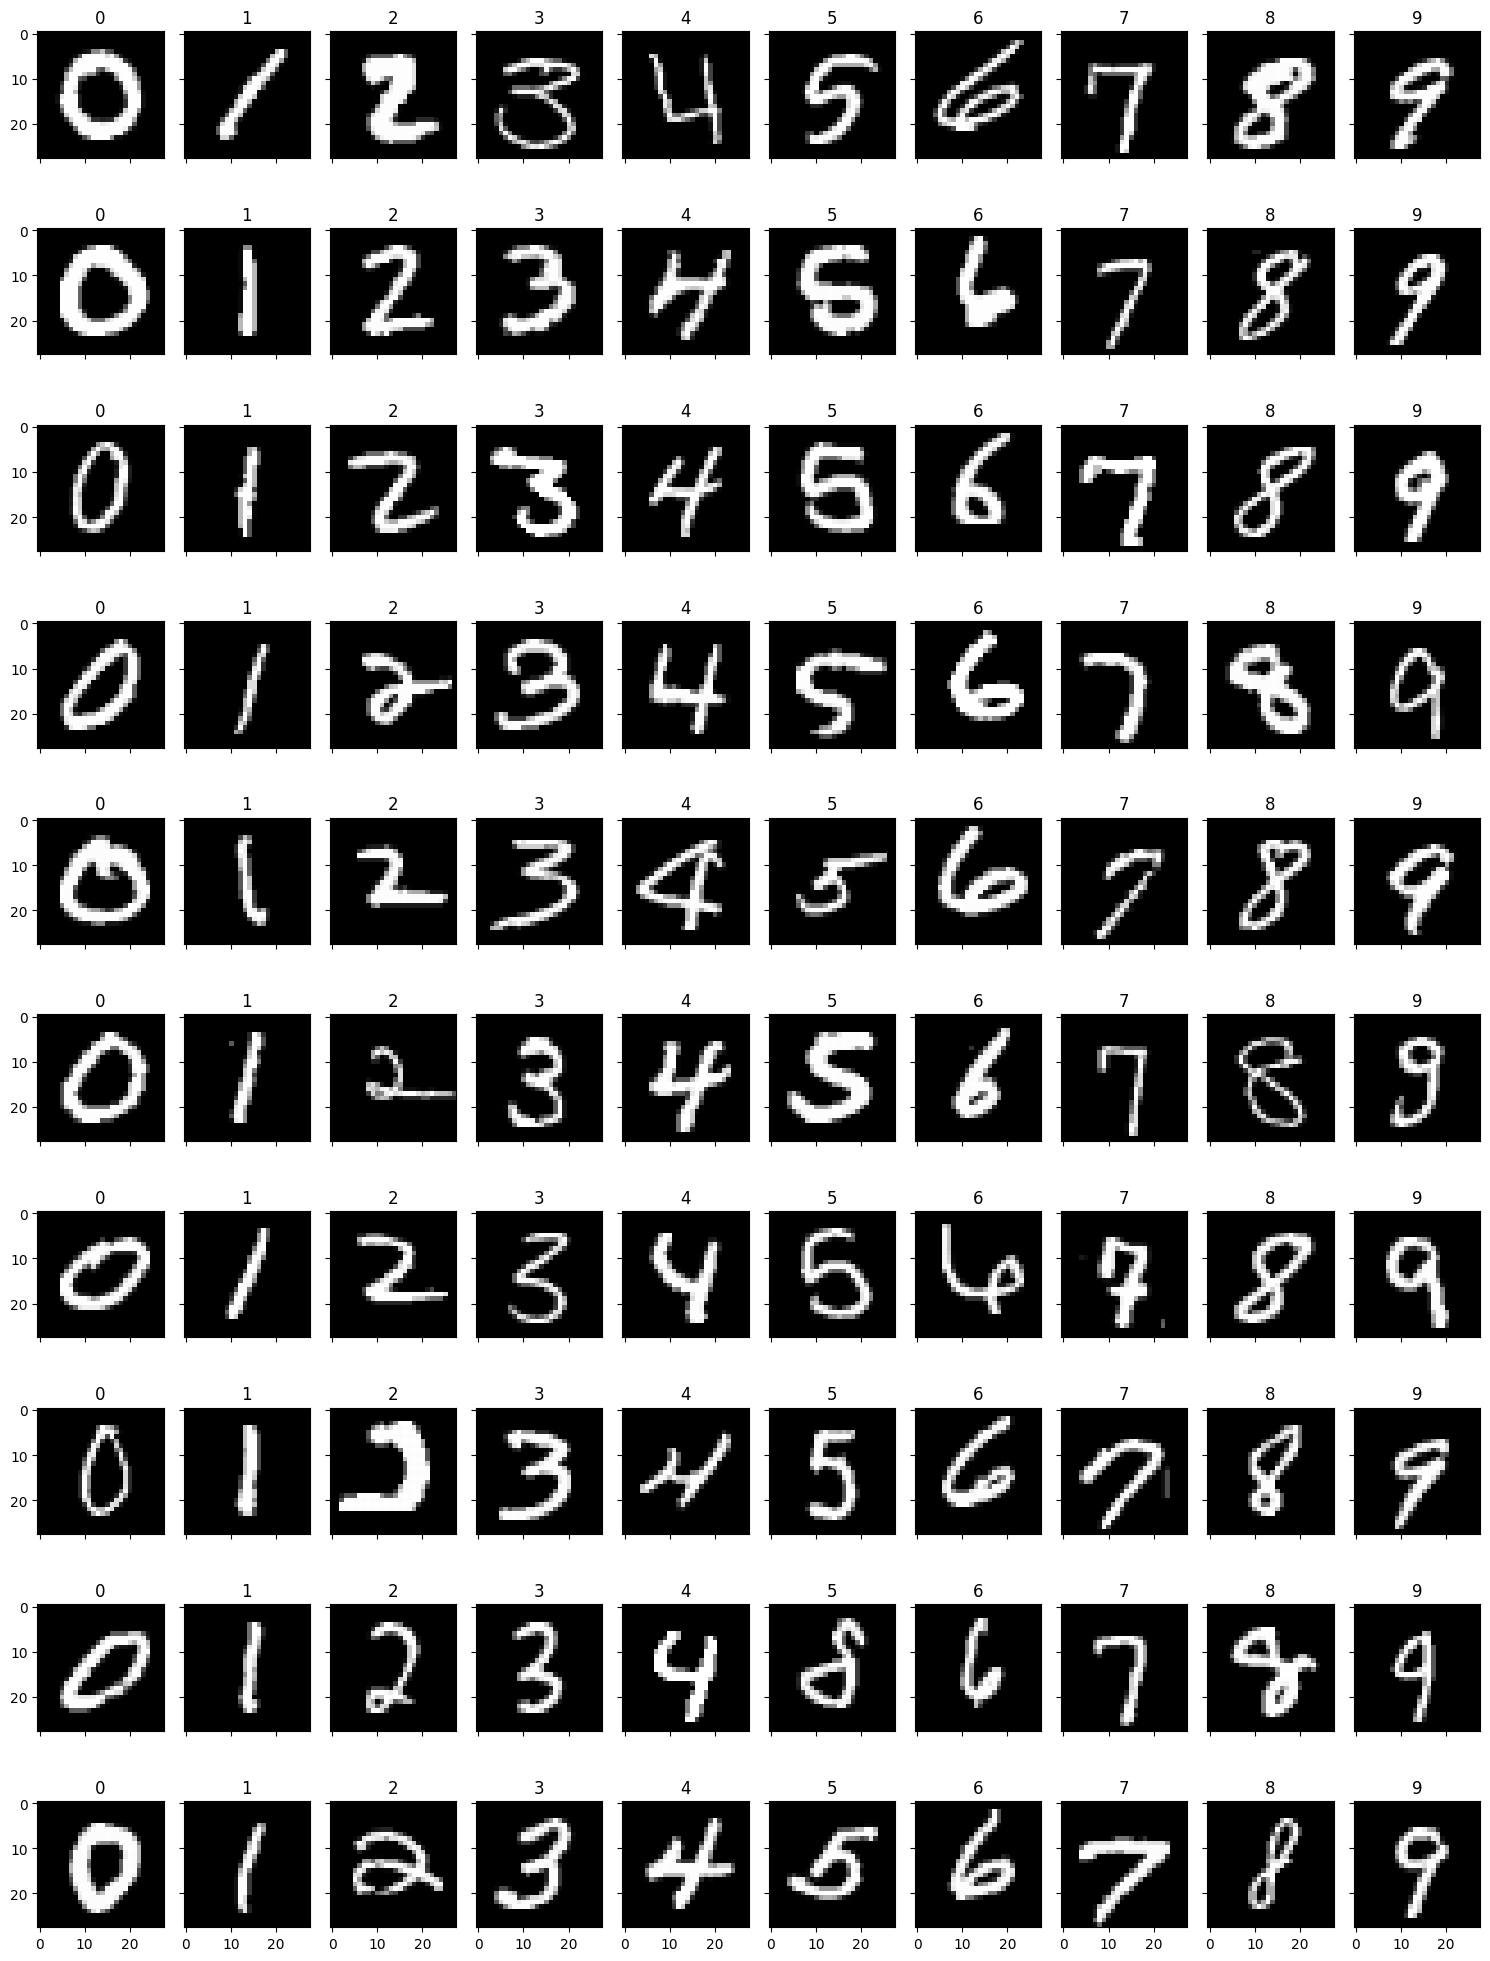

In [6]:
li_idxs = []

# On cherche les 10 premiers index dans notre dataset...
for i in range(10):
    
    # ...pour chaque chiffre
    for nr in range(10):
        ix = y[y==nr].index[i]
        li_idxs.append(ix) 

fig, axs = plt.subplots(10, 10, sharex=True, sharey=True, figsize=(15,20))
axs = axs.flatten()

for n, i in enumerate(li_idxs):
    im = X.iloc[i]
    im = im.values.reshape(-1,img_rows,img_cols,1)
    axs[n].imshow(im[0,:,:,0], cmap=plt.get_cmap('gray'))
    axs[n].set_title(y[i])
plt.tight_layout()    

# Predictive modeling

Let's see what happens if we try to fit some basic models. But before we will define some utility functions.

In [7]:
# pip install seaborn

In [8]:
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


def print_validation_report(y_true, y_pred):
    print("Classification Report")
    print(classification_report(y_true, y_pred))
    acc_sc = accuracy_score(y_true, y_pred)
    print("Accuracy : ", acc_sc)
    
    return acc_sc


def plot_confusion_matrix(y_true, y_pred):
    mtx = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(8,8))
    sns.heatmap(mtx, annot=True, fmt='d', linewidths=.5,  cbar=False, ax=ax)
    #  square=True,
    plt.ylabel('true label')
    plt.xlabel('predicted label')

## Technical interlude

In order to fit a logistic regression, we need to take a sample from the data. This will take much more time if we don't do that.

In [9]:
X_sample = X.sample(frac=0.3, random_state=42)
y_sample = y[X_sample.index]

X_sample.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
5457,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38509,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25536,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31803,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39863,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We will test the algorithms doing a simple train_test_split like in the good old days.

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10080 entries, 11035 to 40569
Columns: 784 entries, pixel0 to pixel783
dtypes: float64(784)
memory usage: 60.4 MB


## Logistic Regression

Let's first fit the simpliest model possible.

Classification Report
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       235
           1       0.95      0.98      0.97       273
           2       0.88      0.87      0.87       260
           3       0.88      0.87      0.87       276
           4       0.89      0.92      0.91       235
           5       0.85      0.85      0.85       228
           6       0.92      0.96      0.94       251
           7       0.93      0.91      0.92       253
           8       0.88      0.86      0.87       253
           9       0.90      0.88      0.89       256

    accuracy                           0.90      2520
   macro avg       0.90      0.90      0.90      2520
weighted avg       0.90      0.90      0.90      2520

Accuracy :  0.9047619047619048


/Users/levkiwi/Dev/64-61.1-Data-Science/.venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


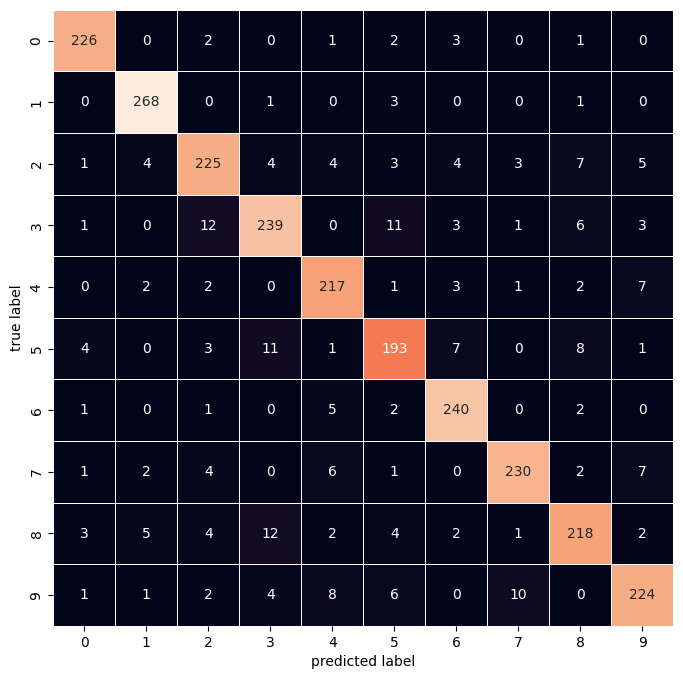

In [11]:
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression(multi_class = 'multinomial', solver = 'saga', random_state = 42)

clf_lr.fit(X_train, y_train)
y_pred = clf_lr.predict(X_test)

acc_lr = print_validation_report(y_test, y_pred)
plot_confusion_matrix(y_test, y_pred)

In [12]:
import os
  
n_cpu = os.cpu_count()
print("Number of CPUs in the system:", n_cpu)

Number of CPUs in the system: 8


## Perceptron

Let's try to fit a single neuron, i.e. a Perceptron.

<img src="Img/Perceptron.jpg">

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33600 entries, 34941 to 15795
Columns: 784 entries, pixel0 to pixel783
dtypes: float64(784)
memory usage: 201.2 MB


Classification Report
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       816
           1       0.96      0.94      0.95       909
           2       0.80      0.86      0.83       846
           3       0.96      0.71      0.82       937
           4       0.80      0.94      0.87       839
           5       0.73      0.81      0.77       702
           6       0.91      0.94      0.93       785
           7       0.89      0.91      0.90       893
           8       0.80      0.85      0.83       835
           9       0.89      0.77      0.83       838

    accuracy                           0.87      8400
   macro avg       0.87      0.87      0.87      8400
weighted avg       0.88      0.87      0.87      8400

Accuracy :  0.8694047619047619


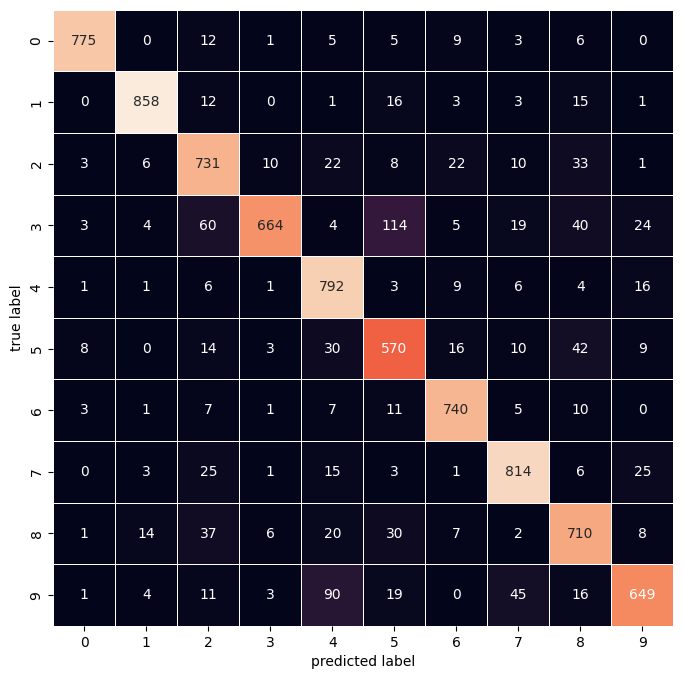

In [14]:
from sklearn.linear_model import Perceptron

clf_perceptron = Perceptron(random_state = 42) # n_jobs = -1 to use all the cores of your machine

param = {
    'penalty' : 'l1', 
    'tol': 0.05
    }

clf_perceptron.set_params(**param)

clf_perceptron.fit(X_train, y_train)
y_pred = clf_perceptron.predict(X_test)

acc_perceptron = print_validation_report(y_test, y_pred)
plot_confusion_matrix(y_test, y_pred)

## Multi-Layer Perceptron

Your first Neural Network.

In [15]:
from sklearn.neural_network import MLPClassifier

clf_mlp = MLPClassifier(random_state = 42)

params = {
    'activation' : 'relu', 
    'alpha' : 0.0001, 
    'batch_size' : 600, 
    'learning_rate_init' : 0.06, 
    'max_iter' : 2000, 
    'solver' : 'sgd', 
    'tol' : 0.0001,
    'hidden_layer_sizes' : (500,50,)
}

clf_mlp.set_params(**params)

clf_mlp.fit(X_train, y_train) 

MLPClassifier(batch_size=600, hidden_layer_sizes=(500, 50),
              learning_rate_init=0.06, max_iter=2000, random_state=42,
              solver='sgd')

Let's test the model

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       816
           1       0.98      0.99      0.99       909
           2       0.98      0.97      0.97       846
           3       0.98      0.97      0.97       937
           4       0.98      0.97      0.98       839
           5       0.96      0.97      0.97       702
           6       0.98      0.99      0.98       785
           7       0.98      0.98      0.98       893
           8       0.98      0.97      0.98       835
           9       0.97      0.97      0.97       838

    accuracy                           0.98      8400
   macro avg       0.98      0.98      0.98      8400
weighted avg       0.98      0.98      0.98      8400

Accuracy :  0.9761904761904762


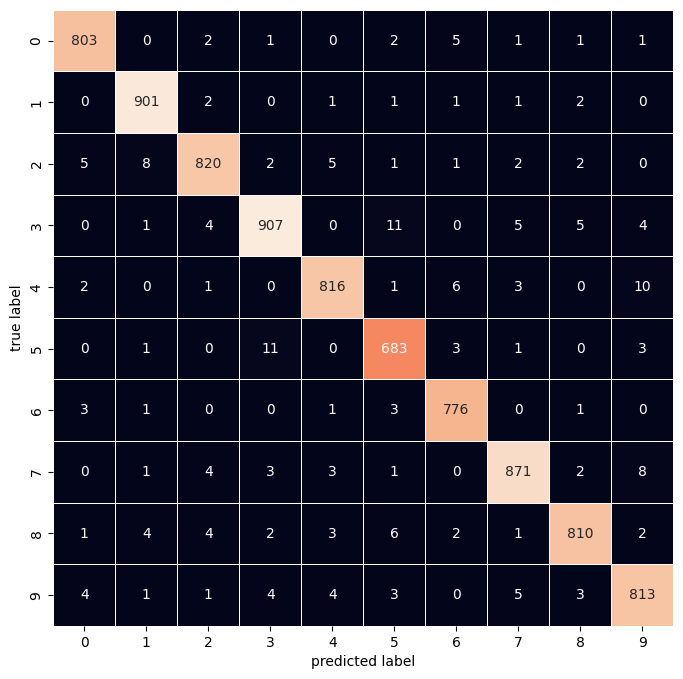

In [16]:
y_pred = clf_mlp.predict(X_test)

acc_mlp = print_validation_report(y_test, y_pred)
plot_confusion_matrix(y_test, y_pred)